In [152]:
import pandas as pd
import plotly.express as px
import numpy  as np

In [153]:
def node_compare(ns, ms, df):
    """
    Create comparison plots for cpu.user_percent, cpu.system_percent, and cpu.idle_percent
    for specific nodes (node01, node13, node59) in the dataset.

    Parameters:
    df (DataFrame): The dataset containing CPU metrics and node information.
    ns (list): List of node names to filter.
    ms (list): List of metric column names to plot.
    """
    df_node = df[df['devices'].isin(ns)]
    # Combine 'year', 'month', and 'day' into a single datetime column for x-axis
    df_node['date'] = pd.to_datetime(df_node[['year', 'month', 'day', 'hour']])
    
    
    # Create and display plots for each metric
    for metric in ms:
        metric_df = df_node[df_node['indices'] == metric]
        fig = px.line(
            metric_df,
            x='date',
            y='datum',
            color='devices',
            title=f'Comparison of {metric.replace("_", " ").title()} Over Time for Specific Nodes',
            labels={
                'datum': metric.replace("_", " ").title(),
                'date': 'date',
                'devices': 'Node'
            }
        )
        fig.update_traces(mode='lines+markers')
        fig.show()


/tmp/ipykernel_1255503/1071334637.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



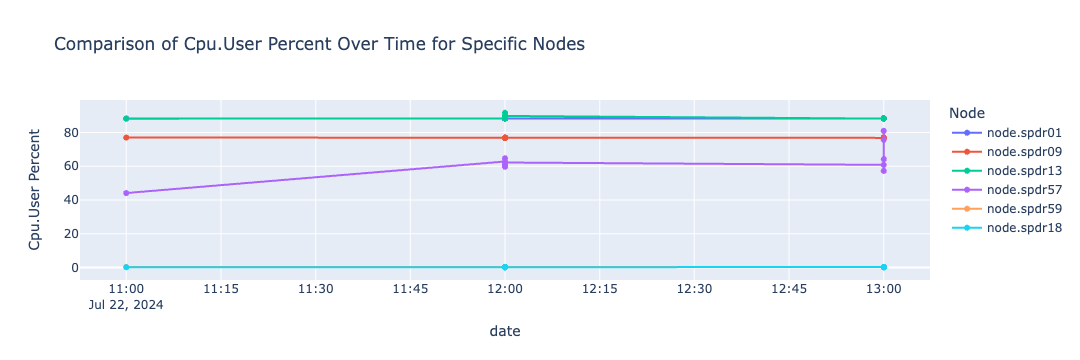

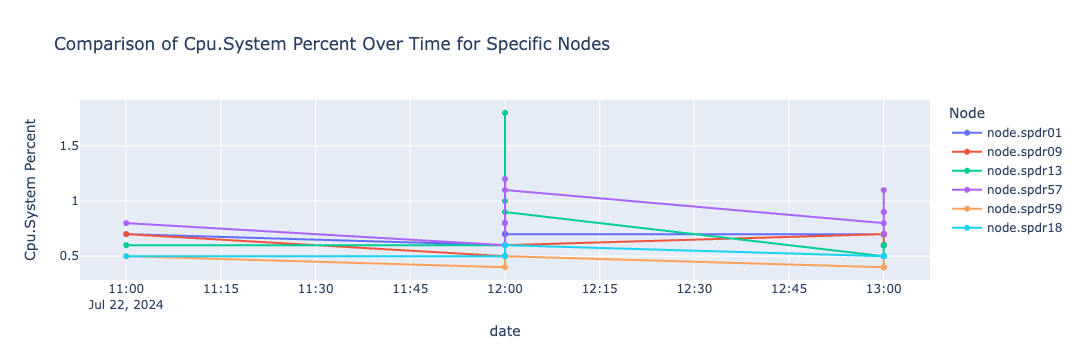

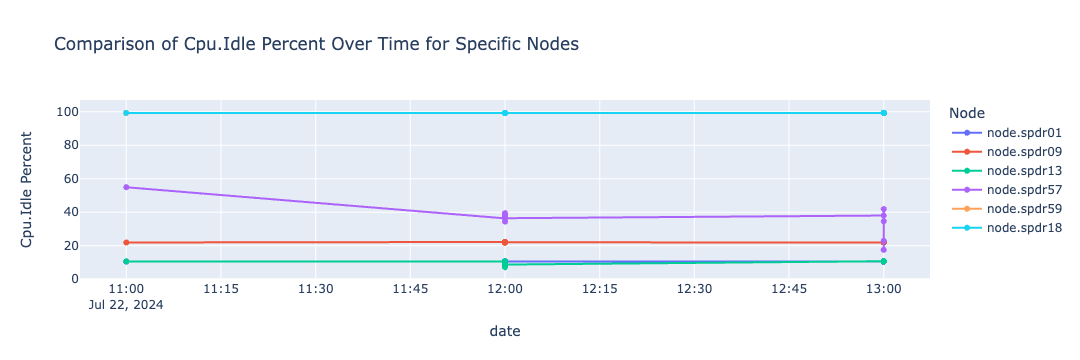

/tmp/ipykernel_1255503/1071334637.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



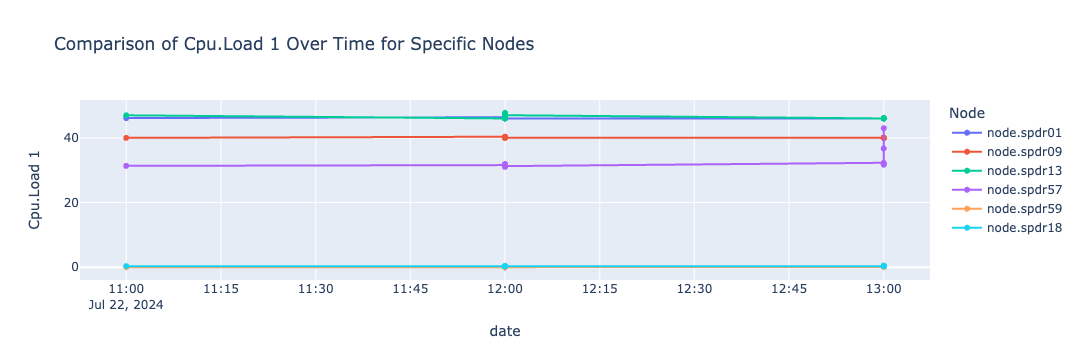

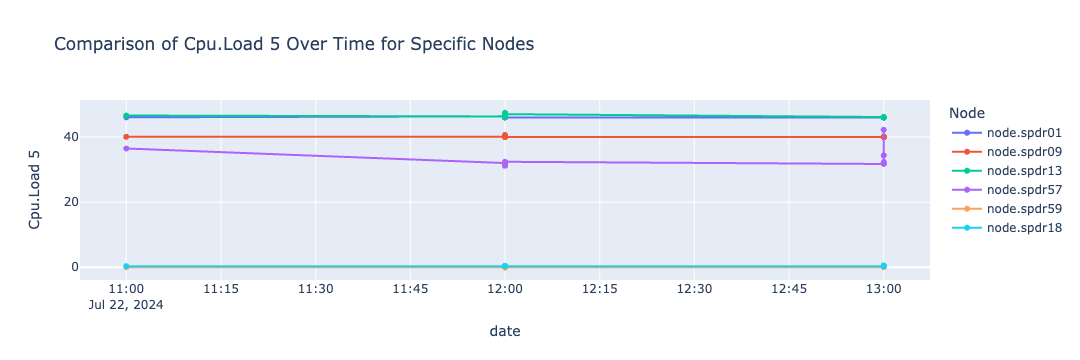

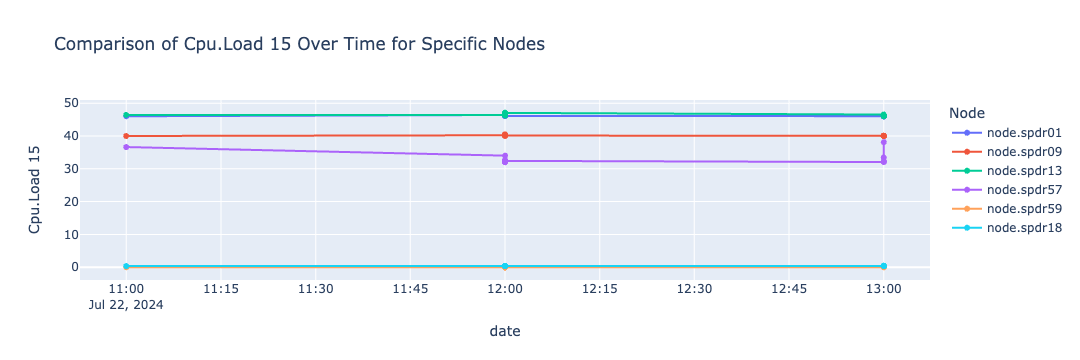

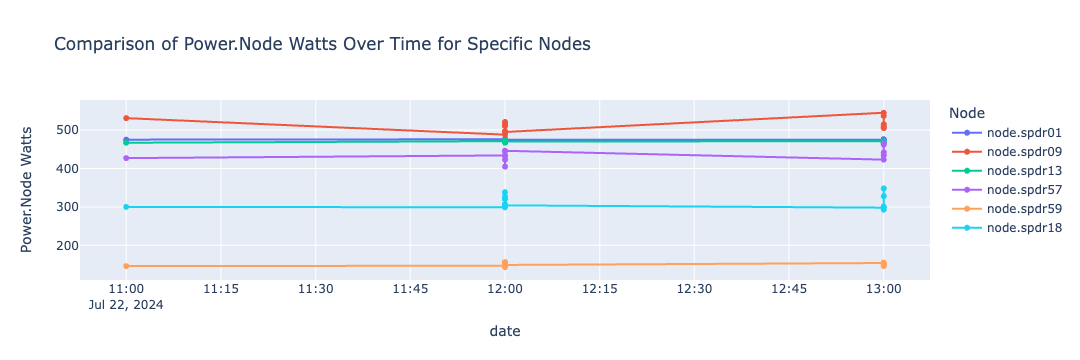

In [154]:
df = pd.read_csv('dataset.csv')
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['indices'].unique()


nodes = ['node.spdr01', 'node.spdr09', 'node.spdr13', 'node.spdr18','node.spdr57', 'node.spdr59']
ms1 = ['cpu.user_percent', 'cpu.system_percent', 'cpu.idle_percent']
#ms2 = ['cpu.irq_percent', 'cpu.softirq_percent', 'cpu.steal_percent', 'cpu.iowait_percent']
ms3 = ['cpu.load_1', 'cpu.load_5', 'cpu.load_15', 'power.node_watts']
node_compare(nodes, ms1, df)
node_compare(nodes, ms3, df)

In [147]:
df

,time,indices,devices,datum,types,methods,units,year,month,day,hour
0,2024-07-11 15:23:00,cpu.user_percent,node.spydur,1.20,float,mean,%,2024,7,11,15
1,2024-07-11 15:23:00,cpu.system_percent,node.spydur,1.70,float,mean,%,2024,7,11,15
2,2024-07-11 15:23:00,cpu.idle_percent,node.spydur,96.90,float,mean,%,2024,7,11,15
3,2024-07-11 15:23:00,cpu.usage_percent,node.spydur,3.10,float,mean,%,2024,7,11,15
4,2024-07-11 15:23:00,cpu.load_1,node.spydur,0.23,float,mean,NaN,2024,7,11,15
...,...,...,...,...,...,...,...,...,...,...,...
577525,2024-07-18 19:44:12,nvidia.power,node.spdr18,94.00,int,mean,NaN,2024,7,18,19
577526,2024-07-18 19:44:12,nvidia.power,node.spdr18,94.00,int,mean,NaN,2024,7,18,19
577527,2024-07-18 19:44:12,nvidia.power,node.spdr18,94.00,int,mean,NaN,2024,7,18,19
577528,2024-07-18 19:44:12,nvidia.power,node.spdr18,94.00,int,mean,NaN,2024,7,18,19


In [144]:
df1 = df[df['devices']== 'node.spdr59']
df2 = df1[df1['indices'] == 'cpu.idle_percent']
df2.head(20)

,time,indices,devices,datum,types,methods,units,year,month,day,hour
377,2024-07-11 15:23:00,cpu.idle_percent,node.spdr59,99.3,float,mean,%,2024,7,11,15
935,2024-07-11 15:25:13,cpu.idle_percent,node.spdr59,99.3,float,mean,%,2024,7,11,15
1493,2024-07-11 15:26:59,cpu.idle_percent,node.spdr59,99.3,float,mean,%,2024,7,11,15
2051,2024-07-11 15:32:14,cpu.idle_percent,node.spdr59,99.3,float,mean,%,2024,7,11,15
2609,2024-07-11 15:47:59,cpu.idle_percent,node.spdr59,99.3,float,mean,%,2024,7,11,15
3167,2024-07-11 15:49:14,cpu.idle_percent,node.spdr59,99.3,float,mean,%,2024,7,11,15
3725,2024-07-11 15:50:37,cpu.idle_percent,node.spdr59,99.3,float,mean,%,2024,7,11,15
4283,2024-07-11 16:00:41,cpu.idle_percent,node.spdr59,99.3,float,mean,%,2024,7,11,16
4841,2024-07-11 16:10:44,cpu.idle_percent,node.spdr59,99.3,float,mean,%,2024,7,11,16
5399,2024-07-11 16:21:15,cpu.idle_percent,node.spdr59,99.3,float,mean,%,2024,7,11,16
